In [3]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv("uber_data.csv")

In [5]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  int64  
 4   trip_distance          100000 non-null  float64
 5   pickup_longitude       100000 non-null  float64
 6   pickup_latitude        100000 non-null  float64
 7   RatecodeID             100000 non-null  int64  
 8   store_and_fwd_flag     100000 non-null  object 
 9   dropoff_longitude      100000 non-null  float64
 10  dropoff_latitude       100000 non-null  float64
 11  payment_type           100000 non-null  int64  
 12  fare_amount            100000 non-null  float64
 13  extra                  100000 non-null  float64
 14  mta_tax                100000 non-nul

In [15]:
df['tpep_pickup_datetime']=pd.to_datetime(df["tpep_pickup_datetime"])
df['tpep_dropoff_datetime']=pd.to_datetime(df["tpep_dropoff_datetime"])


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               100000 non-null  int64         
 1   tpep_pickup_datetime   100000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  100000 non-null  datetime64[ns]
 3   passenger_count        100000 non-null  int64         
 4   trip_distance          100000 non-null  float64       
 5   pickup_longitude       100000 non-null  float64       
 6   pickup_latitude        100000 non-null  float64       
 7   RatecodeID             100000 non-null  int64         
 8   store_and_fwd_flag     100000 non-null  object        
 9   dropoff_longitude      100000 non-null  float64       
 10  dropoff_latitude       100000 non-null  float64       
 11  payment_type           100000 non-null  int64         
 12  fare_amount            100000 non-null  float

In [17]:
df[['tpep_pickup_datetime','tpep_dropoff_datetime']].drop_duplicates()

,tpep_pickup_datetime,tpep_dropoff_datetime
0,2016-03-01 00:00:00,2016-03-01 00:07:55
1,2016-03-01 00:00:00,2016-03-01 00:11:06
2,2016-03-01 00:00:00,2016-03-01 00:31:06
3,2016-03-01 00:00:00,2016-03-01 00:00:00
7,2016-03-01 00:00:01,2016-03-01 00:16:04
...,...,...
99995,2016-03-01 06:17:10,2016-03-01 06:22:15
99996,2016-03-01 06:17:10,2016-03-01 06:32:41
99997,2016-03-01 06:17:10,2016-03-01 06:37:23
99998,2016-03-01 06:17:10,2016-03-01 06:22:09


In [18]:
# datetime_dim=df[['tpep_pickup_datetime','tpep_dropoff_datetime']].drop_duplicates().reset_index(drop=True) 
#this is traditional method for indexing properly

df = df.drop_duplicates().reset_index(drop=True)
df['trip_id'] = df.index
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_id
0,1,2016-03-01,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,0
1,1,2016-03-01,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,1
2,2,2016-03-01,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,2
3,2,2016-03-01,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,3
4,2,2016-03-01,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,4


In [38]:
datetime_dim = df[['tpep_pickup_datetime','tpep_dropoff_datetime']].reset_index(drop=True)
datetime_dim['tpep_pickup_datetime'] = datetime_dim['tpep_pickup_datetime']
datetime_dim['pick_hour'] = datetime_dim['tpep_pickup_datetime'].dt.hour
datetime_dim['pick_day'] = datetime_dim['tpep_pickup_datetime'].dt.day
datetime_dim['pick_month'] = datetime_dim['tpep_pickup_datetime'].dt.month
datetime_dim['pick_year'] = datetime_dim['tpep_pickup_datetime'].dt.year
datetime_dim['pick_weekday'] = datetime_dim['tpep_pickup_datetime'].dt.weekday

datetime_dim['tpep_dropoff_datetime'] = datetime_dim['tpep_dropoff_datetime']
datetime_dim['drop_hour'] = datetime_dim['tpep_dropoff_datetime'].dt.hour
datetime_dim['drop_day'] = datetime_dim['tpep_dropoff_datetime'].dt.day
datetime_dim['drop_month'] = datetime_dim['tpep_dropoff_datetime'].dt.month
datetime_dim['drop_year'] = datetime_dim['tpep_dropoff_datetime'].dt.year
datetime_dim['drop_weekday'] = datetime_dim['tpep_dropoff_datetime'].dt.weekday


datetime_dim['datetime_id'] = datetime_dim.index

# datetime_dim = datetime_dim.rename(columns={'tpep_pickup_datetime': 'datetime_id'}).reset_index(drop=True)
datetime_dim = datetime_dim[['datetime_id', 'tpep_pickup_datetime', 'pick_hour', 'pick_day', 'pick_month', 'pick_year', 'pick_weekday',
                             'tpep_dropoff_datetime', 'drop_hour', 'drop_day', 'drop_month', 'drop_year', 'drop_weekday']]
#
datetime_dim.head()

,datetime_id,tpep_pickup_datetime,pick_hour,pick_day,pick_month,pick_year,pick_weekday,tpep_dropoff_datetime,drop_hour,drop_day,drop_month,drop_year,drop_weekday
0,0,2016-03-01,0,1,3,2016,1,2016-03-01 00:07:55,0,1,3,2016,1
1,1,2016-03-01,0,1,3,2016,1,2016-03-01 00:11:06,0,1,3,2016,1
2,2,2016-03-01,0,1,3,2016,1,2016-03-01 00:31:06,0,1,3,2016,1
3,3,2016-03-01,0,1,3,2016,1,2016-03-01 00:00:00,0,1,3,2016,1
4,4,2016-03-01,0,1,3,2016,1,2016-03-01 00:00:00,0,1,3,2016,1


In [22]:
passenger_count_dim = df[['passenger_count']].reset_index(drop=True)
passenger_count_dim['passenger_count_id'] = passenger_count_dim.index
passenger_count_dim = passenger_count_dim[['passenger_count_id','passenger_count']]

trip_distance_dim = df[['trip_distance']].reset_index(drop=True)
trip_distance_dim['trip_distance_id'] = trip_distance_dim.index
trip_distance_dim = trip_distance_dim[['trip_distance_id','trip_distance']]

In [23]:
passenger_count_dim.head()

,passenger_count_id,passenger_count
0,0,1
1,1,1
2,2,2
3,3,3
4,4,5


In [24]:
trip_distance_dim.head()

,trip_distance_id,trip_distance
0,0,2.50
1,1,2.90
2,2,19.98
3,3,10.78
4,4,30.43


In [25]:
rate_code_type= {
                1:"Standard rate",
                2:"JFK",
                3:"Newark",
                4:"Nassau or Westchester",
                5:"Negotiated Fare",
                6:"Group ride"
}
rate_code_dim=df[['RatecodeID']].reset_index(drop=True)
rate_code_dim["rate_code_id"]=rate_code_dim.index
rate_code_dim["rate_code_name"]=rate_code_dim["RatecodeID"].map(rate_code_type)
rate_code_dim=rate_code_dim[["rate_code_id","RatecodeID","rate_code_name"]]
rate_code_dim.head()

,rate_code_id,RatecodeID,rate_code_name
0,0,1,Standard rate
1,1,1,Standard rate
2,2,1,Standard rate
3,3,1,Standard rate
4,4,3,Newark


In [26]:
pickup_location_dim=df[["pickup_longitude","pickup_latitude"]].reset_index(drop=True)
pickup_location_dim["pickup_location_id"]=pickup_location_dim.index
pickup_location_dim=pickup_location_dim[["pickup_location_id","pickup_longitude","pickup_latitude"]]
dropoff_location_dim=df[["dropoff_longitude","dropoff_latitude"]].reset_index(drop=True)
dropoff_location_dim["dropoff_location_id"]=dropoff_location_dim.index
dropoff_location_dim=dropoff_location_dim[["dropoff_location_id","dropoff_longitude","dropoff_latitude"]]

In [27]:
pickup_location_dim.head()

,pickup_location_id,pickup_longitude,pickup_latitude
0,0,-73.976746,40.765152
1,1,-73.983482,40.767925
2,2,-73.782021,40.644810
3,3,-73.863419,40.769814
4,4,-73.971741,40.792183


In [28]:
dropoff_location_dim.head()

,dropoff_location_id,dropoff_longitude,dropoff_latitude
0,0,-74.004265,40.746128
1,1,-74.005943,40.733166
2,2,-73.974541,40.675770
3,3,-73.969650,40.757767
4,4,-74.177170,40.695053


In [29]:
payment_type_name = {
    1:"Credit card",
    2:"Cash",
    3:"No charge",
    4:"Dispute",
    5:"Unknown",
    6:"Voided trip"
}
payment_type_dim = df[['payment_type']].reset_index(drop=True)
payment_type_dim['payment_type_id'] = payment_type_dim.index
payment_type_dim['payment_type_name'] = payment_type_dim['payment_type'].map(payment_type_name)
payment_type_dim = payment_type_dim[['payment_type_id','payment_type','payment_type_name']]

In [30]:
payment_type_dim.head()

,payment_type_id,payment_type,payment_type_name
0,0,1,Credit card
1,1,1,Credit card
2,2,1,Credit card
3,3,1,Credit card
4,4,1,Credit card


In [39]:

fact_table = df.merge(passenger_count_dim, left_on='trip_id', right_on='passenger_count_id') \
             .merge(trip_distance_dim, left_on='trip_id', right_on='trip_distance_id') \
             .merge(rate_code_dim, left_on='trip_id', right_on='rate_code_id') \
             .merge(pickup_location_dim, left_on='trip_id', right_on='pickup_location_id') \
             .merge(dropoff_location_dim, left_on='trip_id', right_on='dropoff_location_id')\
             .merge(datetime_dim, left_on='trip_id', right_on='datetime_id') \
             .merge(payment_type_dim, left_on='trip_id', right_on='payment_type_id') \
             [['trip_id','VendorID', 'datetime_id', 'passenger_count_id',
               'trip_distance_id', 'rate_code_id', 'store_and_fwd_flag', 'pickup_location_id', 'dropoff_location_id',
               'payment_type_id', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
               'improvement_surcharge', 'total_amount']]

In [40]:
fact_table.head()

,trip_id,VendorID,datetime_id,passenger_count_id,trip_distance_id,rate_code_id,store_and_fwd_flag,pickup_location_id,dropoff_location_id,payment_type_id,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0,1,0,0,0,0,N,0,0,0,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,1,1,1,1,1,N,1,1,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2,2,2,2,2,N,2,2,2,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,3,2,3,3,3,3,N,3,3,3,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,4,2,4,4,4,4,N,4,4,4,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [52]:

# Selecting features and target
X = df[['trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'fare_amount']]
y = df['payment_type']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Initialize and train a Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = clf.predict(X_test)

# Step 7: Evaluate the model
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)

# Extracting TP, TN, FP, FN for each class
TP = np.diag(cm)  # True Positives for each class
FP = cm.sum(axis=0) - TP  # False Positives for each class
FN = cm.sum(axis=1) - TP  # False Negatives for each class
TN = cm.sum() - (FP + FN + TP)  # True Negatives for each class

# Calculate metrics
accuracy = cm.sum() / cm.sum()  # Overall accuracy
precision = TP / (TP + FP)  # Precision for each class
sensitivity = TP / (TP + FN)  # Sensitivity (Recall) for each class
specificity = TN / (TN + FP)  

# Average metrics (weighted average)
weighted_precision = np.sum(precision * (TP + FN)) / cm.sum()
weighted_sensitivity = np.sum(sensitivity * (TP + FN)) / cm.sum()
specificity = np.sum(specificity) / len(specificity)

# Step 8: Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision (Weighted):", weighted_precision)
print("Sensitivity (Recall, Weighted):", weighted_sensitivity)
print(" Specificity:", average_specificity)
print("Classification Report:\n", classification_report(y_test, y_pred))




Confusion Matrix:
 [[13629  6428    16     5]
 [ 5991  3820    21     2]
 [   21    28     5     4]
 [   12     7     6     5]]
Accuracy: 1.0
Precision (Weighted): 0.5864116283919154
Sensitivity (Recall, Weighted): 0.5819666666666666
 Specificity: 0.7663995570340046
Classification Report:
               precision    recall  f1-score   support

           1       0.69      0.68      0.69     20078
           2       0.37      0.39      0.38      9834
           3       0.10      0.09      0.09        58
           4       0.31      0.17      0.22        30

    accuracy                           0.58     30000
   macro avg       0.37      0.33      0.34     30000
weighted avg       0.59      0.58      0.58     30000



Confusion Matrix:
 [[34 25 34]
 [33 34 28]
 [42 29 41]]
Accuracy: 1.0
Precision (Weighted): 0.36765414679438907
Sensitivity (Recall, Weighted): 0.36333333333333334
Average Specificity: 0.6814930970771318
Classification Report:
               precision    recall  f1-score   support

        Card       0.31      0.37      0.34        93
        Cash       0.39      0.36      0.37        95
      Mobile       0.40      0.37      0.38       112

    accuracy                           0.36       300
   macro avg       0.37      0.36      0.36       300
weighted avg       0.37      0.36      0.36       300



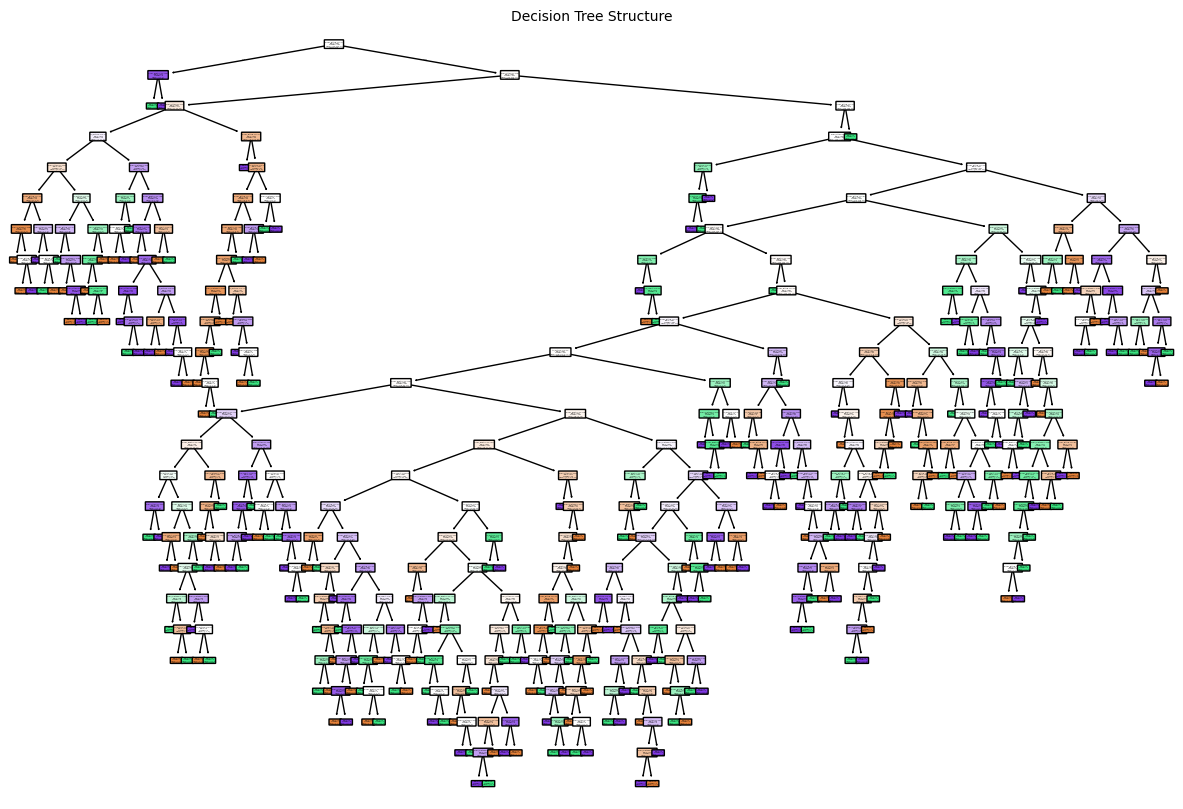

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    confusion_matrix,
    classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example dataset creation (replace this with your actual dataset)
# df = pd.read_csv('your_dataset.csv')  # Load your dataset
# For demonstration purposes, let's create a sample dataset
data = {
    'trip_distance': np.random.rand(1000),
    'pickup_longitude': np.random.rand(1000),
    'pickup_latitude': np.random.rand(1000),
    'dropoff_longitude': np.random.rand(1000),
    'dropoff_latitude': np.random.rand(1000),
    'fare_amount': np.random.rand(1000) * 50,
    'payment_type': np.random.choice(['Cash', 'Card', 'Mobile'], size=1000)
}
df = pd.DataFrame(data)

# Selecting features and target
X = df[['trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'fare_amount']]
y = df['payment_type']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Initialize and train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = clf.predict(X_test)

# Step 7: Evaluate the model
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)

# Extracting TP, TN, FP, FN for each class
TP = np.diag(cm)  # True Positives for each class
FP = cm.sum(axis=0) - TP  # False Positives for each class
FN = cm.sum(axis=1) - TP  # False Negatives for each class
TN = cm.sum() - (FP + FN + TP)  # True Negatives for each class

# Calculate metrics
accuracy = cm.sum() / cm.sum()  # Overall accuracy
precision = TP / (TP + FP)  # Precision for each class
sensitivity = TP / (TP + FN)  # Sensitivity (Recall) for each class
specificity = TN / (TN + FP)  # Specificity for each class

# Average metrics (weighted average)
weighted_precision = np.sum(precision * (TP + FN)) / cm.sum()
weighted_sensitivity = np.sum(sensitivity * (TP + FN)) / cm.sum()
average_specificity = np.sum(specificity) / len(specificity)

# Step 8: Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision (Weighted):", weighted_precision)
print("Sensitivity (Recall, Weighted):", weighted_sensitivity)
print("Average Specificity:", average_specificity)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 10: Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=np.unique(y), filled=True, rounded=True)
plt.title("Decision Tree Structure", fontsize=10)
plt.savefig("Decision tree.png")
plt.show()


Confusion Matrix:
 [[25 35 36]
 [35 39 24]
 [29 41 36]]

Evaluation Metrics:
Overall Accuracy: 0.3333333333333333
Balanced Accuracy: [0.47334559 0.51086078 0.51517215]
Precision for Each Class: [0.28089888 0.33913043 0.375     ]
Sensitivity (Recall) for Each Class: [0.26041667 0.39795918 0.33962264]
Negative Predictive Value (NPV): [0.66350711 0.68108108 0.65686275]
Prevalence: [0.32       0.32666667 0.35333333]
Detection Rate: [0.08333333 0.13       0.12      ]
Detection Prevalence: [0.29666667 0.38333333 0.32      ]
Average Specificity: 0.6669195118420271
Classification Report:
               precision    recall  f1-score   support

        Card       0.28      0.26      0.27        96
        Cash       0.34      0.40      0.37        98
      Mobile       0.38      0.34      0.36       106

    accuracy                           0.33       300
   macro avg       0.33      0.33      0.33       300
weighted avg       0.33      0.33      0.33       300



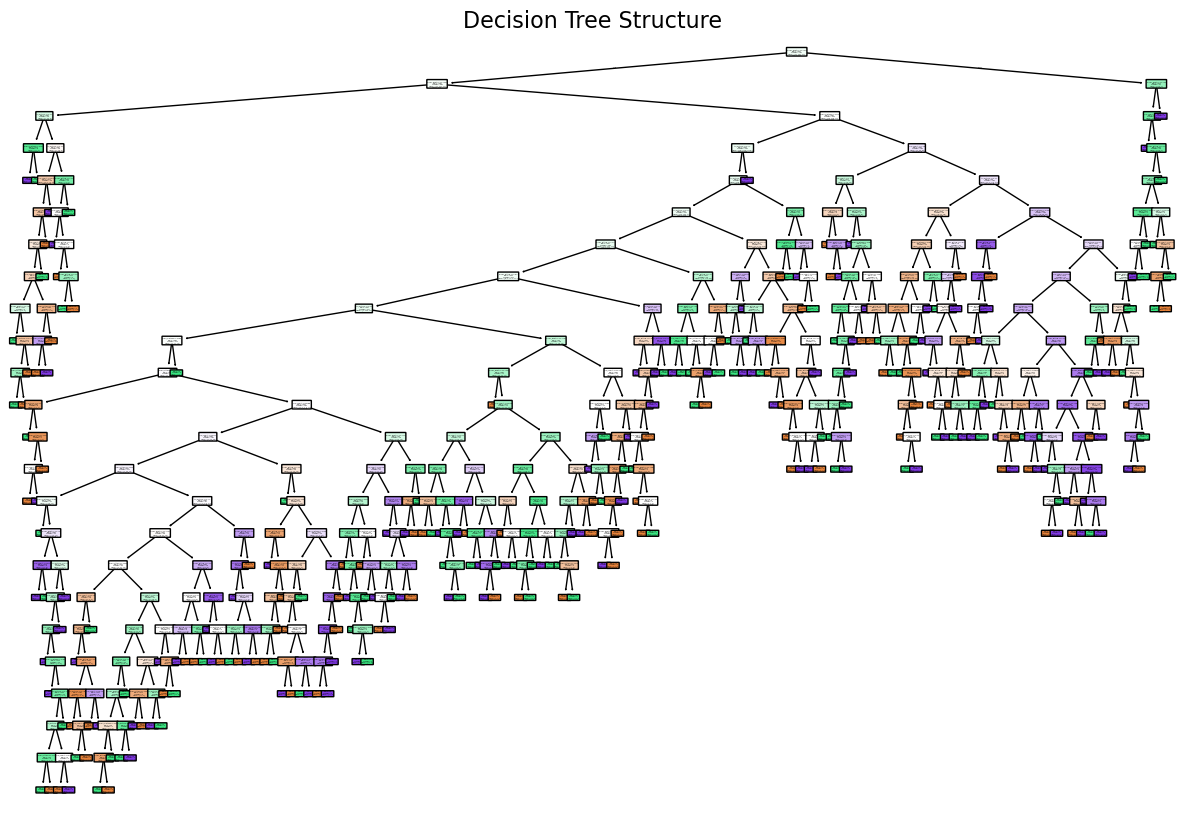

In [64]:


# # Step 5: Initialize and train a Decision Tree Classifier
# clf = DecisionTreeClassifier(random_state=42)
# clf.fit(X_train, y_train)

# # Step 6: Make predictions
# y_pred = clf.predict(X_test)

# # Step 7: Evaluate the model
# # Calculate the confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # Print the confusion matrix
# print("Confusion Matrix:\n", cm)

# # Extracting TP, TN, FP, FN for each class
# TP = np.diag(cm)  # True Positives for each class
# FP = cm.sum(axis=0) - TP  # False Positives for each class
# FN = cm.sum(axis=1) - TP  # False Negatives for each class
# TN = cm.sum() - (FP + FN + TP)  # True Negatives for each class

# # Calculate metrics
# accuracy = accuracy_score(y_test, y_pred)  # Overall accuracy
# precision = precision_score(y_test, y_pred, average=None)  # Precision for each class
# sensitivity = recall_score(y_test, y_pred, average=None)  # Sensitivity for each class
# specificity = TN / (TN + FP)  # Specificity for each class

# # Balanced Accuracy
# balanced_accuracy = (sensitivity + specificity) / 2  # Balanced accuracy

# # Negative Predictive Value (NPV)
# npv = TN / (TN + FN)  # NPV for each class

# # Prevalence
# prevalence = (TP + FN) / cm.sum()  # Prevalence for each class

# # Detection Rate
# detection_rate = TP / cm.sum()  # Detection rate for each class

# # Detection Prevalence
# detection_prevalence = (TP + FP) / cm.sum()  # Detection prevalence for each class

# # Step 8: Print evaluation metrics with formulas
# print("\nEvaluation Metrics:")
# print("Overall Accuracy:", accuracy)  # (TP + TN) / (TP + TN + FP + FN)
# print("Balanced Accuracy:", balanced_accuracy)  # (Sensitivity + Specificity) / 2
# print("Precision for Each Class:", precision)  # TP / (TP + FP)
# print("Sensitivity (Recall) for Each Class:", sensitivity)  # TP / (TP + FN)
# print("Negative Predictive Value (NPV):", npv)  # TN / (TN + FN)
# print("Prevalence:", prevalence)  # (TP + FN) / Total Samples
# print("Detection Rate:", detection_rate)  # TP / Total Samples
# print("Detection Prevalence:", detection_prevalence)  # (TP + FP) / Total Samples
# print("Average Specificity:", np.mean(specificity))  # Mean specificity

# # Classification report for detailed metrics
# print("Classification Report:\n", classification_report(y_test, y_pred))

# # Step 10: Visualize the Decision Tree
# plt.figure(figsize=(15, 10))
# plot_tree(clf, feature_names=X.columns, class_names=np.unique(y), filled=True, rounded=True)
# plt.title("Decision Tree Structure", fontsize=16)
# plt.show()


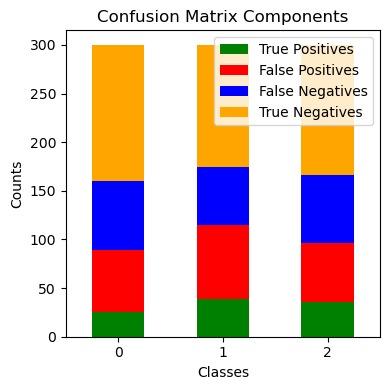

In [98]:

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
sensitivity = recall_score(y_test, y_pred, average=None)

# Visualization using bar chart
class_labels = np.unique(y)

# Create a DataFrame for easier plotting
results_df = pd.DataFrame({
    'Class': class_labels,
    'TP': TP,
    'FP': FP,
    'FN': FN,
    'TN': TN
})

# Plotting
plt.figure(figsize=(4, 4))  # Smaller square size
results_df.set_index('Class').plot(kind='bar', stacked=True, ax=plt.gca(), color=['green', 'red', 'blue', 'orange'])
plt.title('Confusion Matrix Components')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.legend(["True Positives", "False Positives", "False Negatives", "True Negatives"], loc="upper right")
plt.tight_layout() 
plt.savefig("Confusion matrix.png")
plt.show()




Overall Accuracy: 1.0
Confusion Matrix:
 [[ 93   0   0]
 [  0 106   0]
 [  0   0 101]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00       106
           2       1.00      1.00      1.00       101

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



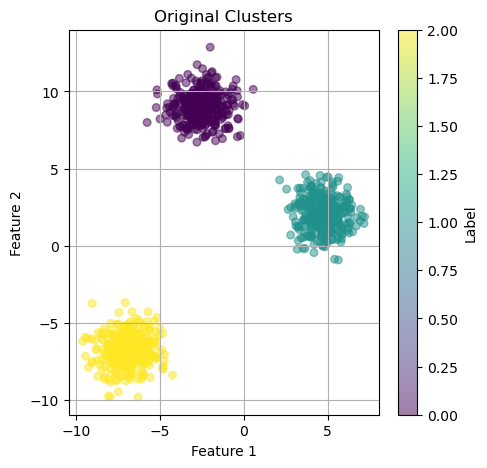

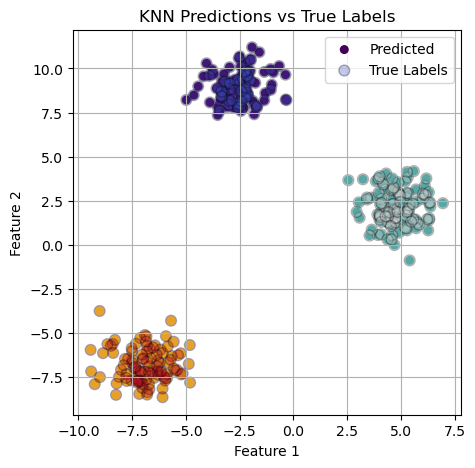

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

# Generate synthetic dataset
X, y = make_blobs(n_samples=1000, centers=3, random_state=42, cluster_std=1.0)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Label'] = y

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Initialize and train a KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed
knn.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = knn.predict(X_test)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Overall Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 5: Visualization of the clusters
plt.figure(figsize=(5, 5))
plt.scatter(df['Feature 1'], df['Feature 2'], c=df['Label'], s=30, cmap='viridis', alpha=0.5)
plt.title('Original Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Label')
plt.grid()
plt.show()

# Visualization of KNN predictions
plt.figure(figsize=(5, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=30, cmap='viridis', marker='o', label='Predicted')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=60, cmap='coolwarm', alpha=0.3, label='True Labels', edgecolors='k')
plt.title('KNN Predictions vs True Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.savefig("KNN vs True predictions.png")
plt.show()


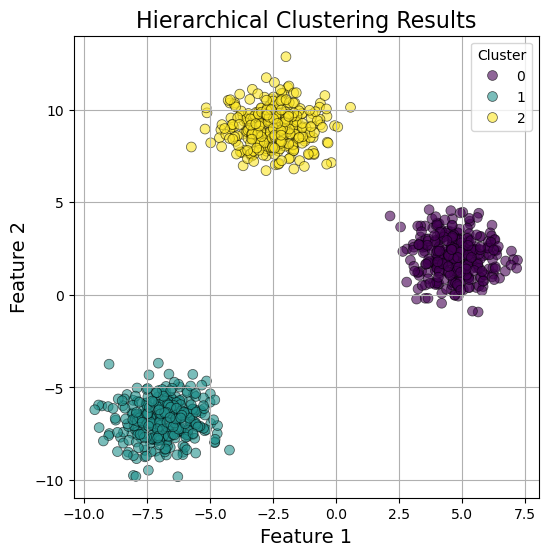

In [96]:
 # Perform Hierarchical Clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=3)
y_hc = hierarchical_clustering.fit_predict(X)

#  Plot the clustered data with enhanced visualization
plt.figure(figsize=(6, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_hc, palette='viridis', s=50, alpha=0.6, edgecolor='k')
plt.title('Hierarchical Clustering Results', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.grid()
plt.legend(title='Cluster', loc='upper right')
plt.savefig("Hierarchial Clustering.png")
plt.show()



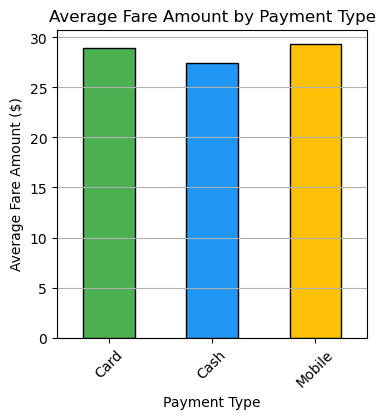

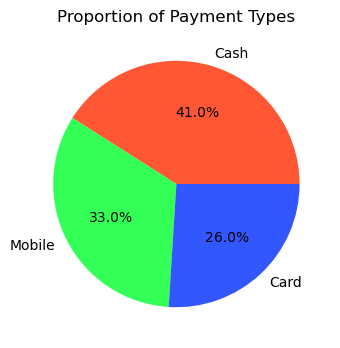

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16248\130683489.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_fare_by_distance = df.groupby('trip_distance_binned')['fare_amount'].mean()


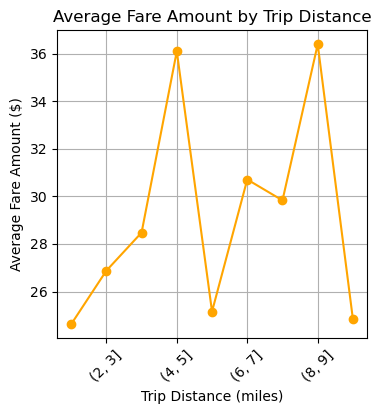

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16248\130683489.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='payment_type', y='fare_amount', data=df, palette='pastel')


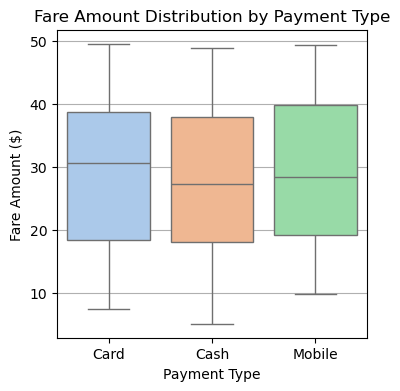

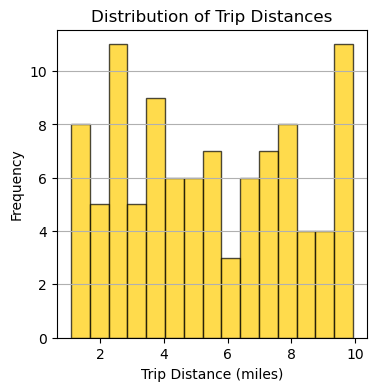

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a hypothetical DataFrame (replace this with your actual data)
data = {
    'trip_distance': np.random.uniform(1, 10, 100),
    'pickup_longitude': np.random.uniform(-74, -73, 100),
    'pickup_latitude': np.random.uniform(40, 41, 100),
    'dropoff_longitude': np.random.uniform(-74, -73, 100),
    'dropoff_latitude': np.random.uniform(40, 41, 100),
    'fare_amount': np.random.uniform(5, 50, 100),
    'payment_type': np.random.choice(['Card', 'Cash', 'Mobile'], 100)  # Example categorical variable
}
df = pd.DataFrame(data)

#  Bar Chart - Average Fare Amount by Payment Type
plt.figure(figsize=(4, 4))
avg_fare = df.groupby('payment_type')['fare_amount'].mean()
avg_fare.plot(kind='bar', color=['#4CAF50', '#2196F3', '#FFC107'], edgecolor='k')
plt.title('Average Fare Amount by Payment Type', fontsize=12)
plt.xlabel('Payment Type', fontsize=10)
plt.ylabel('Average Fare Amount ($)', fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig('average_fare_by_payment_type.png')  # Save the figure
plt.show()

#  Pie Chart - Proportion of Payment Types
plt.figure(figsize=(4, 4))
payment_counts = df['payment_type'].value_counts()
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', colors=['#FF5733', '#33FF57', '#3357FF'])
plt.title('Proportion of Payment Types', fontsize=12)
plt.savefig('proportion_of_payment_types.png')  # Save the figure
plt.show()


#  Line Plot - Average Fare Amount by Trip Distance
plt.figure(figsize=(4, 4))
df['trip_distance_binned'] = pd.cut(df['trip_distance'], bins=np.arange(0, 11, 1))
avg_fare_by_distance = df.groupby('trip_distance_binned')['fare_amount'].mean()

avg_fare_by_distance.plot(kind='line', marker='o', color='orange')
plt.title('Average Fare Amount by Trip Distance', fontsize=12)
plt.xlabel('Trip Distance (miles)', fontsize=10)
plt.ylabel('Average Fare Amount ($)', fontsize=10)
plt.xticks(rotation=45)
plt.grid()
plt.savefig('average_fare_by_trip_distance.png')  # Save the figure
plt.show()


#  Box Plot - Fare Amount Distribution by Payment Type
plt.figure(figsize=(4, 4))
sns.boxplot(x='payment_type', y='fare_amount', data=df, palette='pastel')
plt.title('Fare Amount Distribution by Payment Type', fontsize=12)
plt.xlabel('Payment Type', fontsize=10)
plt.ylabel('Fare Amount ($)', fontsize=10)
plt.grid(axis='y')
plt.savefig('fare_amount_distribution_by_payment_type.png')  # Save the figure
plt.show()

#  Histogram - Distribution of Trip Distances
plt.figure(figsize=(4, 4))
plt.hist(df['trip_distance'], bins=15, color='#FFCC00', edgecolor='k', alpha=0.7)
plt.title('Distribution of Trip Distances', fontsize=12)
plt.xlabel('Trip Distance (miles)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(axis='y')
plt.savefig('distribution_of_trip_distances.png')  # Save the figure
plt.show()
